In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
wine = pd.read_csv('winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [69]:
wine[wine['quality'].isin([7,8])].sample(10)[['alcohol']].reset_index().drop(columns =['index'])

,alcohol
0,11.4
1,12.1
2,9.8
3,13.3
4,10.0
5,10.0
6,11.8
7,12.4
8,9.5
9,12.3


In [70]:
np.random.seed(11)
newseed = wine[wine['quality'].isin([7,8])].sample(10)[['alcohol']].reset_index().drop(columns =['index'])
newseed

,alcohol
0,12.0
1,12.5
2,11.7
3,14.0
4,12.7
5,12.1
6,11.0
7,10.0
8,10.8
9,9.7


In [71]:
newseed_mean=np.mean(newseed["alcohol"])
print("the mean of the sample is: ",newseed_mean)
newseed_std=np.std(newseed["alcohol"])
print("the standard deviation of the sample is: ",newseed_std)

the mean of the sample is:  11.65
the standard deviation of the sample is:  1.2387493693237548


C:\Users\DEVI LAKSHMI\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'mean of sample 1 = 11.65standard deviation of sample1 =1.2387493693237548')

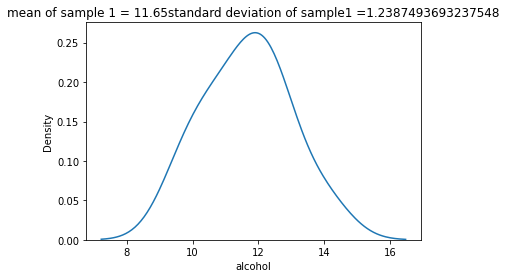

In [72]:
sns.distplot(newseed["alcohol"],hist = False)
title = "mean of sample 1 = " +str(newseed_mean) + "standard deviation of sample1 =" + str(newseed_std)
plt.title(title)

# calculate the standard error


In [73]:
n=10
s=newseed_std
standard_error = s/np.sqrt(n)
print('standard error is:',standard_error)

standard error is: 0.39172694571601785


# problem 2

In [74]:
seed = np.arange(0,9)

x_bar  =[]
newseed_box = []
for s in seed:
    np.random.seed(s)
    newseed = wine[wine['quality'].isin([7,8])].sample(10)[['alcohol']].reset_index().drop(columns =['index'])
    x_bar.append(np.mean(newseed["alcohol"]))  
    newseed_box.append(np.std(newseed["alcohol"]))
samples = pd.DataFrame(columns = ["sample means(x_bar)","sample standrad deviation(s)"],data= list(zip(x_bar,newseed_box)))
samples                    

,sample means(x_bar),sample standrad deviation(s)
0,11.02,0.669029
1,11.14,0.971802
2,11.21,1.013361
3,11.63,0.888876
4,11.45,0.908020
5,11.24,0.935094
6,11.32,1.231909
7,11.39,0.773886
8,11.30,0.507937


C:\Users\DEVI LAKSHMI\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of the sample means')

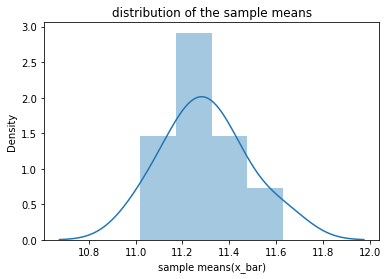

In [75]:
sns.distplot(samples["sample means(x_bar)"])
plt.title("distribution of the sample means")

In [77]:
standard_error = np.array(samples["sample means(x_bar)"]).std()
print('the standard error is:',standard_error)

the standard error is: 0.16852299546352748
